In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


datasets for training and testing

In [78]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\HP\Desktop\Fire-Detection\training",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\HP\Desktop\Fire-Detection\test",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 651 images belonging to 2 classes.
Found 998 images belonging to 2 classes.


In [79]:
test_dataset.class_indices

{'fire_images': 0, 'non_fire_images': 1}

Model Building



In [80]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model



In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model



In [82]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
21/21 [==============================] - 46s 2s/step - loss: 0.3959 - accuracy: 0.8018 - val_loss: 0.6992 - val_accuracy: 0.6804
Epoch 2/10
21/21 [==============================] - 35s 2s/step - loss: 0.3048 - accuracy: 0.8602 - val_loss: 0.4636 - val_accuracy: 0.8647
Epoch 3/10
21/21 [==============================] - 33s 2s/step - loss: 0.2957 - accuracy: 0.8525 - val_loss: 0.5597 - val_accuracy: 0.8257
Epoch 4/10
21/21 [==============================] - 29s 1s/step - loss: 0.2480 - accuracy: 0.8817 - val_loss: 0.6423 - val_accuracy: 0.7896
Epoch 5/10
21/21 [==============================] - 24s 1s/step - loss: 0.2704 - accuracy: 0.8909 - val_loss: 0.4866 - val_accuracy: 0.7946
Epoch 6/10
21/21 [==============================] - 27s 1s/step - loss: 0.2285 - accuracy: 0.8940 - val_loss: 1.3061 - val_accuracy: 0.4148
Epoch 7/10
21/21 [==============================] - 27s 1s/step - loss: 0.1675 - accuracy: 0.9293 - val_loss: 0.7080 - val_accuracy: 0.7776
Epoch 8/10
21/21 [==

Predicting on Test Dataset



In [83]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

32/32 [==============================] - 22s 675ms/step


In [84]:
predictions


array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [85]:
print(len(predictions))


998


Plotting loss per iteration

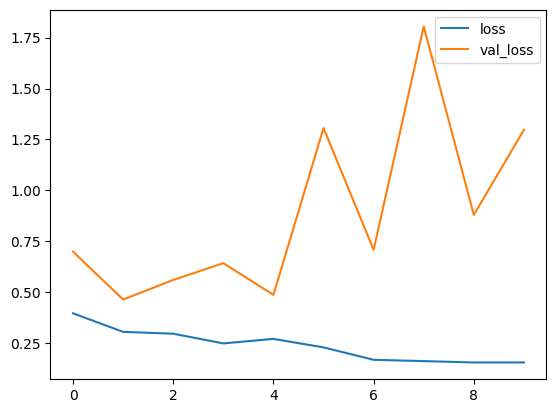

In [126]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Plotting accuracy per iteration



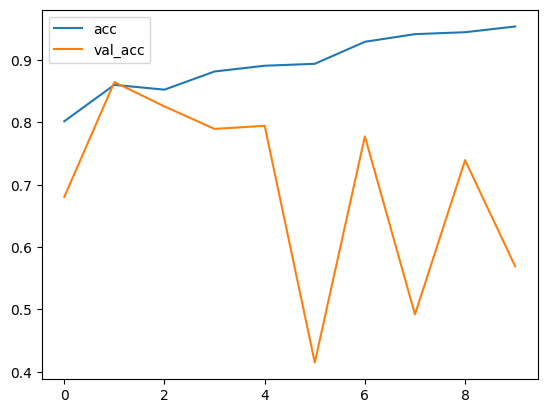

In [127]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [106]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=32)
    elif val == 0:
        plt.xlabel("Fire",fontsize=32)

1/1 [==============================] - 0s 43ms/step
[[1.]]


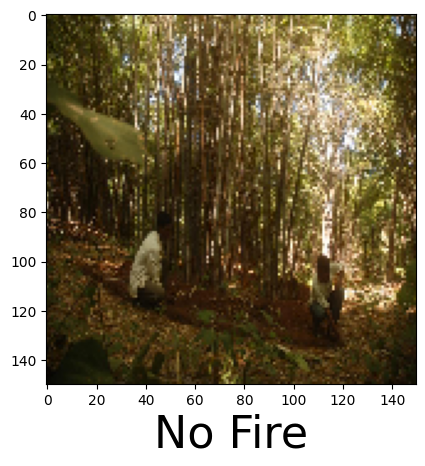

In [134]:
predictImage(r"C:\Users\HP\Desktop\Fire-Detection\test\non_fire_images\non_fire.203.png")


1/1 [==============================] - 0s 27ms/step
[[0.]]


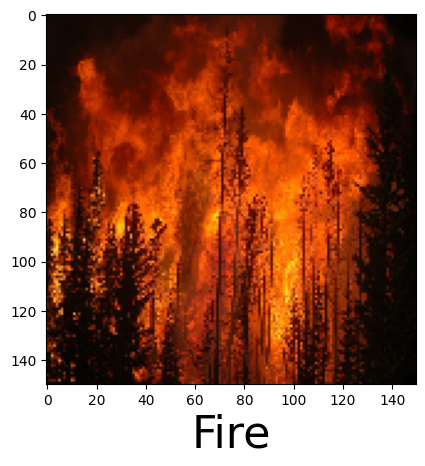

In [129]:
predictImage(r"C:\Users\HP\Desktop\Fire-Detection\test\fire_images\fire.68.png")